# Exploratory Analysis Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
import sys
import numpy as np

sys.path.append('/Users/nickolaspedrimiranda/CodeUp/Regression-Project/')

In [2]:
import acquire as ac
import prepare as prep
import evaluate as ev

import seaborn as sns

from scipy import stats

In [3]:
query = query = '''SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, poolcnt, 
            garagecarcnt, fireplacecnt, fips, yearbuilt, lotsizesquarefeet, logerror
            FROM properties_2017 JOIN predictions_2017 USING(id)
            WHERE SUBSTR(transactiondate, 1, 4) = 2017 AND propertylandusetypeid = 261'''
zil = ac.sql_query('zillow', query)

In [4]:
zil = prep.prep_zillow(zil, mvp=False)

In [5]:
zil, val, test = prep.train_val_test(zil)

In [6]:
zil.head()

,bedrooms,bathrooms,sq_ft,price,pools,garages,fireplaces,fips,year,lot_sq_ft,logerror
31158,4,2.5,1707.0,657000.0,0,2,0,Orange County,1994,3150.0,-0.099648
26388,2,1.0,960.0,57857.0,0,0,0,Los Angeles County,1941,6854.0,0.072931
26578,3,3.0,2353.0,526693.0,1,0,0,Los Angeles County,1951,16045.0,-0.060670
27070,2,1.0,977.0,364079.0,0,0,0,Los Angeles County,1950,5283.0,0.029803
11713,4,3.0,2159.0,384807.0,0,0,0,Los Angeles County,1986,5148.0,0.240006


In [7]:
zil.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'price', 'pools', 'garages',
       'fireplaces', 'fips', 'year', 'lot_sq_ft', 'logerror'],
      dtype='object')

### What relationship is there between fips and logerror?

<Axes: xlabel='fips', ylabel='logerror'>

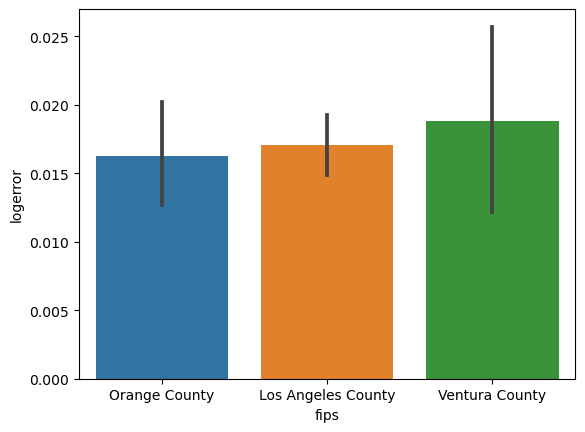

In [8]:
sns.barplot(zil, x='fips', y='logerror')

In [25]:
avg = zil.logerror.mean()
vent = zil[zil.fips == 'Ventura County'].logerror

In [26]:
t, p = stats.ttest_1samp(vent, avg)
ev.check_ttest(t, p, tails=1)

There is no signifcant result. P-value was 0.6.
T-value was greater than 0. With a value of 0.53.


### What relationship is there between price and logerror?

<Axes: xlabel='logerror', ylabel='price'>

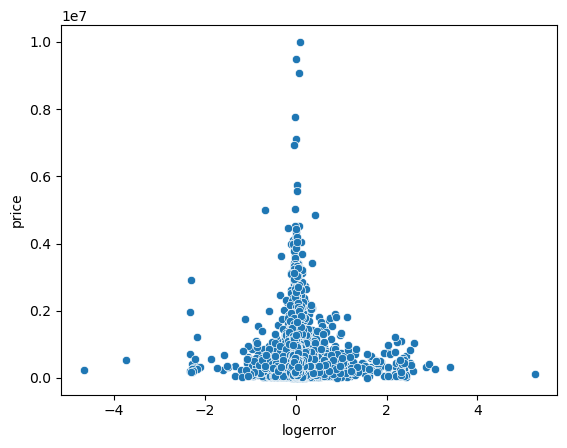

In [9]:
sns.scatterplot(zil, y='price', x='logerror')

In [16]:
r, p = stats.pearsonr(zil.price, zil.logerror)

In [17]:
ev.eval_pearson_r(r,p)

There is no signifcant result. P-value was 0.33.
There is a very slight negative correlation. R-value was -0.005.


### What relationship is there between sq_ft and logerror?

<Axes: xlabel='logerror', ylabel='sq_ft'>

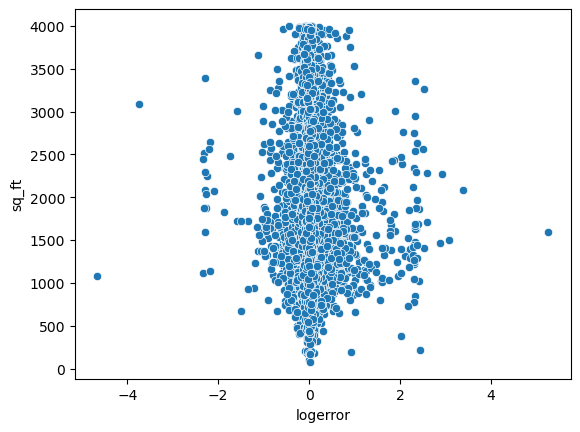

In [12]:
sns.scatterplot(zil, x='logerror', y='sq_ft')

In [18]:
r, p = stats.pearsonr(zil.sq_ft, zil.logerror)
ev.eval_pearson_r(r,p)

There is no signifcant result. P-value was 0.21.
There is a very slight negative correlation. R-value was -0.007.


### What relationship is there between year and logerror?

<Axes: xlabel='logerror', ylabel='year'>

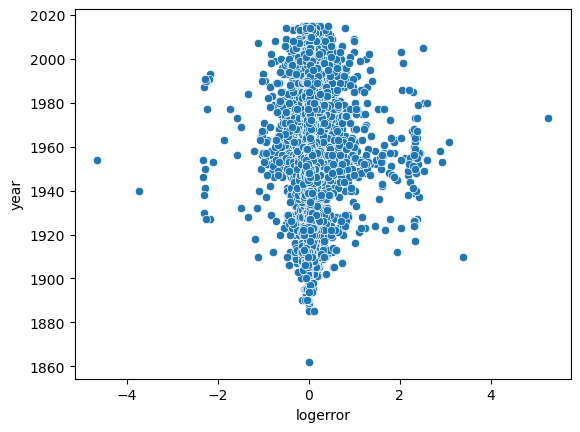

In [13]:
sns.scatterplot(zil, x='logerror', y='year')

In [19]:
r, p = stats.pearsonr(zil.year, zil.logerror)
ev.eval_pearson_r(r,p)

There is no signifcant result. P-value was 0.25.
There is a very slight negative correlation. R-value was -0.006.


### What relationship is there between bedrooms and logerror?

<Axes: xlabel='bedrooms', ylabel='logerror'>

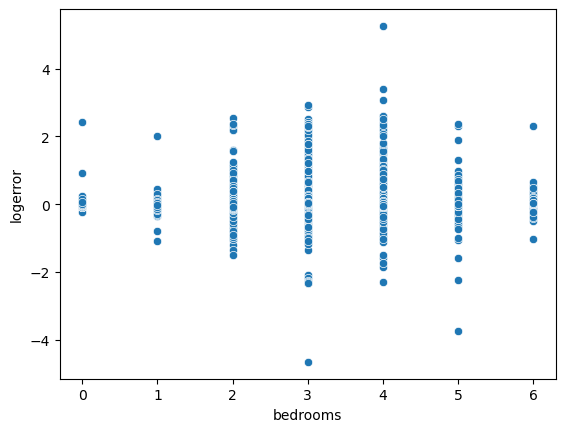

In [14]:
sns.scatterplot(zil, x='bedrooms', y='logerror')

In [20]:
r, p = stats.pearsonr(zil.bedrooms, zil.logerror)
ev.eval_pearson_r(r,p)

There is no signifcant result. P-value was 0.94.
There is a very slight positive correlation. R-value was 0.0.


## 2. Answer those questions through a mix of statistical tests and visualizations.

In [15]:
# Done above